### Simple linear Regression Model in python
##### Home prediction

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model



In [4]:
#Load load from git hub
home_price_df = pd.read_csv("https://raw.githubusercontent.com/josephjaiyeola/home_prediction_LM/main/data/homeprices.csv")
home_price_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


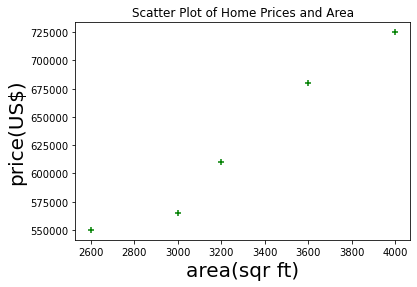

In [43]:
%matplotlib inline
plt.xlabel('area(sqr ft)', fontsize = 20)
plt.ylabel('price(US$)', fontsize = 20)
plt.title('Scatter Plot of Home Prices and Area')
plt.scatter(home_price_df.area, home_price_df.price, color = 'green', marker = '+')

In [23]:
reg = linear_model.LinearRegression()
reg.fit(home_price_df[['area']], home_price_df.price)

LinearRegression()

In [27]:
reg.predict([[3300]])

/Users/josephjaiyeola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [28]:
reg.coef_

array([135.78767123])

In [29]:
reg.intercept_

180616.43835616432

In [ ]:
#y = m*x +b


In [38]:
area_df = pd.read_csv("https://raw.githubusercontent.com/josephjaiyeola/home_prediction_LM/main/data/areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [39]:
predict = reg.predict(area_df)
predict

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [40]:
area_df['prices'] = predict
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [42]:
area_df.to_csv("prediction.csv", index = False)

NameError: name 'area' is not defined

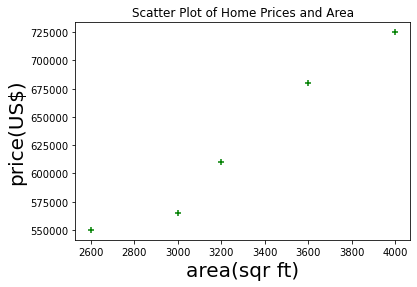

In [47]:
%matplotlib inline
plt.xlabel('area(sqr ft)', fontsize = 20)
plt.ylabel('price(US$)', fontsize = 20)
plt.title('Scatter Plot of Home Prices and Area')
plt.scatter(home_price_df.area, home_price_df.price, color = 'green', marker = '+')
plt.plot(home_price_df.area, reg.predict(area), color = 'blue')

In [ ]:
#continue from here

#
#https://www.youtube.com/watch?v=8jazNUpO3lQ&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=2